In [510]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import numpy as np
from datetime import datetime
%matplotlib inline

#### Get data for each year in html format

In [20]:
#Using requests to get the html version of webpage
html = requests.get('https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2020;type=year').content

In [21]:
#Parse the data using bs4 and pass the html 
soup = BeautifulSoup(html, 'html.parser')

In [22]:
# Formatted html
print(soup)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<!-- hostname: web03, edition-view: , country: unknown, cluster: www, created: 2022-04-27 05:20:33 -->
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://developers.facebook.com/schema/" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
<meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<title>2020 Cricket Team Records &amp; Stats | ESPNcricinfo.com</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="Records,  / , 2020,  / , One-Day Internationals,  / , Match results records, stats, bowling, batting, wicket keeper" name="keywords"/>
<meta content="Read about Records,  / , 2020,  / , On

In [15]:
#Get the list of columns by looping through thead and saving the list as headers
columns = soup.find('thead')
print(columns)
headers = []
for i in columns.find_all('th'):
 title = i.text
 headers.append(title)
print(headers)

<thead>
<tr class="head">
<th class="left" nowrap="nowrap" title="team">Team 1</th>
<th class="left" nowrap="nowrap" title="team">Team 2</th>
<th class="left" nowrap="nowrap" title="winner/result">Winner</th>
<th class="left" nowrap="nowrap" title="result margin">Margin</th>
<th class="left" nowrap="nowrap" title="ground played on">Ground</th>
<th nowrap="nowrap" title="match date span">Match Date</th>
<th nowrap="nowrap" title="match scorecard">Scorecard</th>
</tr>
</thead>
['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date', 'Scorecard']


In [7]:
with open('dataset/one_day_cricket.csv', 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(headers) 

In [8]:
#Find all rows within the table
rows = soup.find_all('td','left')
print(rows)

rows = soup.find_all('tr', 'data1')
print(rows)

[<td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/37.html">Oman</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/27.html">U.A.E.</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/37.html">Oman</a></td>, <td class="left" nowrap="nowrap">5 wickets</td>, <td class="left"><a class="data-link" href="/ci/content/ground/1095893.html">Al Amerat</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/28.html">Namibia</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/27.html">U.A.E.</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/27.html">U.A.E.</a></td>, <td class="left" nowrap="nowrap">8 runs</td>, <td class="left"><a class="data-link" href="/ci/content/ground/1095893.html">Al Amerat</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/4.html">West Indie

In [13]:
with open('dataset/one_day_cricket.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)       
    # writing the fields 
    csvwriter.writerow(headers)
    #csvwriter.writerows(row_main)
    for item in row_main:
        csvwriter.writerow(item)

In [24]:
#function to Scrap the detail score based on url passed which contains link to detail score page
def detail_scoreboard(url):
    #url = "https://stats.espncricinfo.com/ci/engine/match/1211169.html"
    #print(url)
    html = requests.get(url).content
        #Parse the data
    soup = BeautifulSoup(html, 'html.parser')
    #print(soup)
    #rows = soup.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
    rows = soup.find_all("div", {"class": "ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"})
    #for row in rows:
    detail_score = []
#<div class="ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-opacity-50 ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="United Arab Emirates Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313147.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/united-arab-emirates-27" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">United Arab Emirates</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5"></span><strong class="">170</strong></div></div><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="Oman Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313157.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/oman-37" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">Oman</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5">(37.3/50 ov) </span><strong class="">171/5</strong></div></div></div>
    for row in rows:
        columns = row.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
        for column in columns:
            x = column.text
            print(x)
            detail_score.append(x)
        columns1 = row.find_all("div", {"class": "ds-text-compact-m ds-text-typo-title"})
        for column in columns1:
            y = column.text
            print(y)
            detail_score.append(y)
    #print(detail_score)
    return detail_score #return list containing first/seconf innings team and score

In [25]:
#function getting the summary of one day matches year by year and then passing the detail score url to detail_scoreboard function

def file_writing(html):
    #Parse the data
    soup = BeautifulSoup(html, 'html.parser')
    row_main = []
    rows = soup.find_all('tr', 'data1')
    #columns = soup.find_all('td')
    #print(rows)
    for row in rows:
        columns = row.find_all('td')
        #print(columns)
        row_details = []
        
        for column in columns:
            print("Column values ", column.text)
            x = column.text
            row_details.append(x)
            if "ODI #" in x:
                href_tags = row.find(  href=True, string = x)
                #print(href_tags['href'])
                complete_url = "https://stats.espncricinfo.com"+href_tags['href']
                #print(complete_url)
                detail_record = []
                detail_score = []
                #detail_record = detail_scoreboard(complete_url)
                #first_inn_team, second_inn_team = detail_scoreboard(complete_url)
                detail_score = detail_scoreboard(complete_url)
                
                #print(detail_record)
                #print(detail_score)
                #row_details.append(first_inn_team)
                #row_details.append(second_inn_team)
                row_details = row_details + detail_score
                
        #print('\n')
        #print(row_details)
        #row_details= row_details + detail_record
        row_main.append(row_details)
        #row_main = row_main + detail_record
        #row_main.append
    print(row_main)
    with open('dataset/one_day_cricket.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
        csvwriter = csv.writer(csvfile)       
        # writing the fields 
        #csvwriter.writerow(headers)
        #csvwriter.writerows(row_main)
        for item in row_main:
            csvwriter.writerow(item)

In [32]:
#Writing the headerd
def file_header_writing(html):
    #Parse the data
    #print("Inside file_header_writing ")
    soup = BeautifulSoup(html, 'html.parser')
    row_main = []
    rows = soup.find_all('tr', 'data1')
    #columns = soup.find_all('td')
    #print(rows)
    columns = soup.find('thead')
    #print(columns)
    headers = []
    detail_columns = ['First_Innings_Team','Second_Innings_Team', 'First_Innings_Score','Second_Innings_Score']
    for i in columns.find_all('th'):
        title = i.text
        headers.append(title)
    headers = headers + detail_columns
    with open('dataset/one_day_cricket.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
        csvwriter = csv.writer(csvfile)       
        # writing the fields 
        csvwriter.writerow(headers)

In [35]:
#Main calling function


year = 1971
html = requests.get('https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id='+str(year)+';type=year').content
#print(html)
#file_header_writing(html)
for year in range(2010, 2023):
    print("Extracting data of year: ",year)
    html = requests.get('https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id='+str(year)+';type=year').content
    file_writing(html)
    #print(html)

Extracting data of year:  2010
Column values  Bangladesh
Column values  Sri Lanka
Column values  Sri Lanka
Column values  7 wickets
Column values  Mirpur
Column values  Jan 4, 2010
Column values  ODI # 2937
Bangladesh
Sri Lanka
260/7
(44.5/50 ov) 261/3
Column values  India
Column values  Sri Lanka
Column values  Sri Lanka
Column values  5 wickets
Column values  Mirpur
Column values  Jan 5, 2010
Column values  ODI # 2938
India
Sri Lanka
279/9
(48/50 ov, T:280) 283/5
Column values  Bangladesh
Column values  India
Column values  India
Column values  6 wickets
Column values  Mirpur
Column values  Jan 7, 2010
Column values  ODI # 2939
Bangladesh
India
296/6
(47.3/50 ov) 297/4
Column values  Bangladesh
Column values  Sri Lanka
Column values  Sri Lanka
Column values  9 wickets
Column values  Mirpur
Column values  Jan 8, 2010
Column values  ODI # 2940
Bangladesh
Sri Lanka
249/9
(42.5/50 ov, T:250) 252/1
Column values  India
Column values  Sri Lanka
Column values  India
Column values  8 wickets

New Zealand
Australia
238
(31.1/34 ov, T:200) 202/4
Column values  West Indies
Column values  Zimbabwe
Column values  West Indies
Column values  4 wickets
Column values  Kingstown
Column values  Mar 12, 2010
Column values  ODI # 2974
Zimbabwe
West Indies
141
(34.3/50 ov) 142/6
Column values  New Zealand
Column values  Australia
Column values  New Zealand
Column values  51 runs
Column values  Wellington
Column values  Mar 13, 2010
Column values  ODI # 2975
New Zealand
Australia
241/9
(46.1/50 ov, T:242) 190
Column values  West Indies
Column values  Zimbabwe
Column values  West Indies
Column values  4 wickets
Column values  Kingstown
Column values  Mar 14, 2010
Column values  ODI # 2976
Zimbabwe
West Indies
161
(27.4/50 ov, T:162) 165/6
Column values  West Indies
Column values  Canada
Column values  West Indies
Column values  208 runs
Column values  Kingston
Column values  Apr 13, 2010
Column values  ODI # 2977
West Indies
Canada
316/4
(39.2/50 ov, T:317) 108
Column values  West Indies
C

Netherlands
Kenya
229
(30/50 ov, T:230) 112
Column values  England
Column values  Australia
Column values  Australia
Column values  42 runs
Column values  Lord's
Column values  Jul 3, 2010
Column values  ODI # 3011
Australia
England
277/7
(46.3/50 ov, T:278) 235
Column values  Afghanistan
Column values  Kenya
Column values  Afghanistan
Column values  1 wicket
Column values  Amstelveen
Column values  Jul 5, 2010
Column values  ODI # 3012
Kenya
Afghanistan
233/7
(50 ov) 234/9
Column values  Ireland
Column values  Scotland
Column values  Ireland
Column values  5 wickets
Column values  The Hague
Column values  Jul 5, 2010
Column values  ODI # 3013
Scotland
Ireland
117
(34.2/50 ov, T:118) 120/5
Column values  Netherlands
Column values  Canada
Column values  Netherlands
Column values  7 wickets
Column values  Rotterdam
Column values  Jul 5, 2010
Column values  ODI # 3014
Canada
Netherlands
168
(42.4/50 ov) 169/3
Column values  Canada
Column values  Ireland
Column values  Ireland
Column value

Ireland
Zimbabwe
200
(50 ov, T:201) 206/8
Column values  Zimbabwe
Column values  Ireland
Column values  Zimbabwe
Column values  3 wickets
Column values  Harare
Column values  Sep 28, 2010
Column values  ODI # 3049
Ireland
Zimbabwe
238/9
(48.5/50 ov) 239/7
Column values  Zimbabwe
Column values  Ireland
Column values  Ireland
Column values  20 runs
Column values  Harare
Column values  Sep 30, 2010
Column values  ODI # 3050
Ireland
Zimbabwe
244
(47.4/50 ov, T:245) 224
Column values  Bangladesh
Column values  New Zealand
Column values  Bangladesh
Column values  9 runs
Column values  Mirpur
Column values  Oct 5, 2010
Column values  ODI # 3051
Bangladesh
New Zealand
228
(37/37 ov, T:210) 200/8
Column values  Kenya
Column values  Afghanistan
Column values  Kenya
Column values  92 runs
Column values  Nairobi (Gym)
Column values  Oct 7, 2010
Column values  ODI # 3052
Kenya
Afghanistan
180
(27.5/50 ov, T:181) 88
Column values  Kenya
Column values  Afghanistan
Column values  Afghanistan
Column va

Column values  South Africa
Column values  India
Column values  South Africa
Column values  135 runs
Column values  Durban
Column values  Jan 12, 2011
Column values  ODI # 3079
South Africa
India
289/9
(35.4/50 ov, T:290) 154
Column values  South Africa
Column values  India
Column values  India
Column values  1 run
Column values  Johannesburg
Column values  Jan 15, 2011
Column values  ODI # 3080
India
South Africa
190
(43/50 ov, T:191) 189
Column values  Australia
Column values  England
Column values  Australia
Column values  6 wickets
Column values  Melbourne
Column values  Jan 16, 2011
Column values  ODI # 3081
England
Australia
294
(49.1/50 ov, T:295) 297/4
Column values  South Africa
Column values  India
Column values  India
Column values  2 wickets
Column values  Cape Town
Column values  Jan 18, 2011
Column values  ODI # 3082
South Africa
India
220
(48.2/50 ov, T:221) 223/8
Column values  Australia
Column values  England
Column values  Australia
Column values  46 runs
Column value

Pakistan
Canada
184
(42.5/50 ov, T:185) 138
Column values  New Zealand
Column values  Zimbabwe
Column values  New Zealand
Column values  10 wickets
Column values  Ahmedabad
Column values  Mar 4, 2011
Column values  ODI # 3117
Zimbabwe
New Zealand
162
(33.3/50 ov, T:163) 166/0
Column values  Bangladesh
Column values  West Indies
Column values  West Indies
Column values  9 wickets
Column values  Mirpur
Column values  Mar 4, 2011
Column values  ODI # 3118
Bangladesh
West Indies
58
(12.2/50 ov) 59/1
Column values  Sri Lanka
Column values  Australia
Column values  no result
Column values  
Column values  Colombo (RPS)
Column values  Mar 5, 2011
Column values  ODI # 3119
Sri Lanka
Australia
(32.5/50 ov) 146/3
Column values  England
Column values  South Africa
Column values  England
Column values  6 runs
Column values  Chennai
Column values  Mar 6, 2011
Column values  ODI # 3120
England
South Africa
171
(47.4/50 ov, T:172) 165
Column values  India
Column values  Ireland
Column values  India
C

West Indies
Pakistan
220
(48/50 ov, T:221) 223/3
Column values  West Indies
Column values  Pakistan
Column values  Pakistan
Column values  3 wickets
Column values  Bridgetown
Column values  Apr 28, 2011
Column values  ODI # 3154
West Indies
Pakistan
171
(40.1/45 ov, T:172) 177/7
Column values  West Indies
Column values  Pakistan
Column values  West Indies
Column values  1 run
Column values  Bridgetown
Column values  May 2, 2011
Column values  ODI # 3155
Pakistan
West Indies
248/9
(29.5/29.5 ov) 154/4
Column values  West Indies
Column values  Pakistan
Column values  West Indies
Column values  10 wickets
Column values  Providence
Column values  May 5, 2011
Column values  ODI # 3156
Pakistan
West Indies
139
(23.3/50 ov) 140/0
Column values  Ireland
Column values  Pakistan
Column values  Pakistan
Column values  7 wickets
Column values  Belfast
Column values  May 28, 2011
Column values  ODI # 3157
Ireland
Pakistan
96
(27.3/36 ov, T:95) 97/3
Column values  Ireland
Column values  Pakistan
Col

Zimbabwe
Pakistan
225/6
(42.1/50 ov, T:226) 228/0
Column values  England
Column values  India
Column values  tied
Column values  
Column values  Lord's
Column values  Sep 11, 2011
Column values  ODI # 3191
India
England
280/5
(48.5/48.5 ov, T:271) 270/8
Column values  Netherlands
Column values  Kenya
Column values  Netherlands
Column values  2 wickets
Column values  The Hague
Column values  Sep 12, 2011
Column values  ODI # 3192
Kenya
Netherlands
208/8
(42/43 ov, T:196) 198/8
Column values  Netherlands
Column values  Kenya
Column values  Netherlands
Column values  4 wickets
Column values  The Hague
Column values  Sep 13, 2011
Column values  ODI # 3193
Kenya
Netherlands
184/8
(45/50 ov, T:185) 187/6
Column values  Zimbabwe
Column values  Pakistan
Column values  Pakistan
Column values  28 runs
Column values  Harare
Column values  Sep 14, 2011
Column values  ODI # 3194
Pakistan
Zimbabwe
270/5
(50 ov, T:271) 242/9
Column values  England
Column values  India
Column values  England
Column va

Column values  South Africa
Column values  Sri Lanka
Column values  South Africa
Column values  258 runs
Column values  Paarl
Column values  Jan 11, 2012
Column values  ODI # 3225
South Africa
Sri Lanka
301/8
(20.1/50 ov, T:302) 43
Column values  South Africa
Column values  Sri Lanka
Column values  South Africa
Column values  5 wickets
Column values  East London
Column values  Jan 14, 2012
Column values  ODI # 3226
Sri Lanka
South Africa
236/6
(48.4/50 ov) 237/5
Column values  South Africa
Column values  Sri Lanka
Column values  South Africa
Column values  4 runs
Column values  Bloemfontein
Column values  Jan 17, 2012
Column values  ODI # 3227
Sri Lanka
South Africa
266/9
(34/34 ov, T:176) 179/5
Column values  South Africa
Column values  Sri Lanka
Column values  Sri Lanka
Column values  5 wickets
Column values  Kimberley
Column values  Jan 20, 2012
Column values  ODI # 3228
South Africa
Sri Lanka
299/7
(48.4/50 ov, T:300) 304/5
Column values  South Africa
Column values  Sri Lanka
Colum

Australia
West Indies
204/8
(32.2/50 ov, T:205) 140
Column values  India
Column values  Pakistan
Column values  India
Column values  6 wickets
Column values  Mirpur
Column values  Mar 18, 2012
Column values  ODI # 3263
Pakistan
India
329/6
(47.5/50 ov) 330/4
Column values  West Indies
Column values  Australia
Column values  West Indies
Column values  5 wickets
Column values  Kingstown
Column values  Mar 18, 2012
Column values  ODI # 3264
Australia
West Indies
154/9
(38.2/40 ov, T:158) 163/5
Column values  Bangladesh
Column values  Sri Lanka
Column values  Bangladesh
Column values  5 wickets
Column values  Mirpur
Column values  Mar 20, 2012
Column values  ODI # 3265
Sri Lanka
Bangladesh
232
(37.1/40 ov) 212/5
Column values  West Indies
Column values  Australia
Column values  tied
Column values  
Column values  Kingstown
Column values  Mar 20, 2012
Column values  ODI # 3266
Australia
West Indies
(49.5/50 ov) 220
(49.4/50 ov, T:221) 220
Column values  Bangladesh
Column values  Pakistan
Co

Pakistan
Australia
198
(48.2/50 ov) 199/6
Column values  England
Column values  South Africa
Column values  England
Column values  4 wickets
Column values  The Oval
Column values  Aug 31, 2012
Column values  ODI # 3300
South Africa
England
211
(48/50 ov) 212/6
Column values  Australia
Column values  Pakistan
Column values  Pakistan
Column values  7 wickets
Column values  Abu Dhabi
Column values  Aug 31, 2012
Column values  ODI # 3301
Australia
Pakistan
248/9
(43.4/50 ov) 249/3
Column values  England
Column values  South Africa
Column values  England
Column values  6 wickets
Column values  Lord's
Column values  Sep 2, 2012
Column values  ODI # 3302
South Africa
England
220/8
(46.4/50 ov, T:221) 224/4
Column values  Australia
Column values  Pakistan
Column values  Australia
Column values  3 wickets
Column values  Sharjah
Column values  Sep 3, 2012
Column values  ODI # 3303
Pakistan
Australia
244/7
(47/50 ov, T:245) 250/7
Column values  England
Column values  South Africa
Column values  S

Column values  India
Column values  Pakistan
Column values  Pakistan
Column values  85 runs
Column values  Kolkata
Column values  Jan 3, 2013
Column values  ODI # 3315
Pakistan
India
250
(48/50 ov, T:251) 165
Column values  India
Column values  Pakistan
Column values  India
Column values  10 runs
Column values  Delhi
Column values  Jan 6, 2013
Column values  ODI # 3316
India
Pakistan
167
(48.5/50 ov, T:168) 157
Column values  Australia
Column values  Sri Lanka
Column values  Australia
Column values  107 runs
Column values  Melbourne
Column values  Jan 11, 2013
Column values  ODI # 3317
Australia
Sri Lanka
305/5
(40/50 ov, T:306) 198
Column values  India
Column values  England
Column values  England
Column values  9 runs
Column values  Rajkot
Column values  Jan 11, 2013
Column values  ODI # 3318
England
India
325/4
(50 ov, T:326) 316/9
Column values  Australia
Column values  Sri Lanka
Column values  Sri Lanka
Column values  8 wickets
Column values  Adelaide
Column values  Jan 13, 2013
C

Sri Lanka
Bangladesh
302/9
(26/27 ov, T:183) 184/7
Column values  Zimbabwe
Column values  Bangladesh
Column values  Bangladesh
Column values  121 runs
Column values  Bulawayo
Column values  May 3, 2013
Column values  ODI # 3353
Bangladesh
Zimbabwe
269/8
(32.1/50 ov, T:270) 148
Column values  Zimbabwe
Column values  Bangladesh
Column values  Zimbabwe
Column values  6 wickets
Column values  Bulawayo
Column values  May 5, 2013
Column values  ODI # 3354
Bangladesh
Zimbabwe
252/9
(47.5/50 ov) 253/4
Column values  Zimbabwe
Column values  Bangladesh
Column values  Zimbabwe
Column values  7 wickets
Column values  Bulawayo
Column values  May 8, 2013
Column values  ODI # 3355
Bangladesh
Zimbabwe
247/9
(47.1/50 ov, T:248) 251/3
Column values  Scotland
Column values  Pakistan
Column values  Pakistan
Column values  96 runs
Column values  Edinburgh
Column values  May 17, 2013
Column values  ODI # 3356
Pakistan
Scotland
231/7
(39.4/50 ov, T:232) 135
Column values  Ireland
Column values  Pakistan
Colu

Pakistan
West Indies
224/9
(41/50 ov, T:225) 98
Column values  West Indies
Column values  Pakistan
Column values  West Indies
Column values  37 runs
Column values  Providence
Column values  Jul 16, 2013
Column values  ODI # 3390
West Indies
Pakistan
232/8
(47.5/50 ov, T:233) 195
Column values  West Indies
Column values  Pakistan
Column values  tied
Column values  
Column values  Gros Islet
Column values  Jul 19, 2013
Column values  ODI # 3391
Pakistan
West Indies
229/6
(50 ov, T:230) 229/9
Column values  Sri Lanka
Column values  South Africa
Column values  Sri Lanka
Column values  180 runs
Column values  Colombo (RPS)
Column values  Jul 20, 2013
Column values  ODI # 3392
Sri Lanka
South Africa
320/5
(31.5/50 ov, T:321) 140
Column values  West Indies
Column values  Pakistan
Column values  Pakistan
Column values  6 wickets
Column values  Gros Islet
Column values  Jul 21, 2013
Column values  ODI # 3393
West Indies
Pakistan
261/7
(30/31 ov) 189/4
Column values  Sri Lanka
Column values  Sou

Pakistan
South Africa
209
(40.4/50 ov, T:210) 143
Column values  India
Column values  Australia
Column values  India
Column values  57 runs
Column values  Bengaluru
Column values  Nov 2, 2013
Column values  ODI # 3428
India
Australia
383/6
(45.1/50 ov, T:384) 326
Column values  Bangladesh
Column values  New Zealand
Column values  Bangladesh
Column values  4 wickets
Column values  Fatullah
Column values  Nov 3, 2013
Column values  ODI # 3429
New Zealand
Bangladesh
307/5
(49.2/50 ov, T:308) 309/6
Column values  Pakistan
Column values  South Africa
Column values  South Africa
Column values  68 runs
Column values  Abu Dhabi
Column values  Nov 6, 2013
Column values  ODI # 3430
South Africa
Pakistan
259/8
(44.3/50 ov, T:260) 191
Column values  Pakistan
Column values  South Africa
Column values  South Africa
Column values  28 runs
Column values  Abu Dhabi
Column values  Nov 8, 2013
Column values  ODI # 3431
South Africa
Pakistan
266/5
(49.2/50 ov, T:267) 238
Column values  Sri Lanka
Column va

Column values  New Zealand
Column values  West Indies
Column values  New Zealand
Column values  159 runs
Column values  Queenstown
Column values  Jan 1, 2014
Column values  ODI # 3451
New Zealand
West Indies
283/4
(21/21 ov, T:284) 124/5
Column values  New Zealand
Column values  West Indies
Column values  New Zealand
Column values  58 runs
Column values  Nelson
Column values  Jan 4, 2014
Column values  ODI # 3452
New Zealand
West Indies
285/6
(33.4/33.4 ov, T:193) 134/5
Column values  New Zealand
Column values  West Indies
Column values  West Indies
Column values  203 runs
Column values  Hamilton
Column values  Jan 8, 2014
Column values  ODI # 3453
West Indies
New Zealand
363/4
(29.5/50 ov, T:364) 160
Column values  Australia
Column values  England
Column values  Australia
Column values  6 wickets
Column values  Melbourne
Column values  Jan 12, 2014
Column values  ODI # 3454
England
Australia
269/7
(45.4/50 ov) 270/4
Column values  Australia
Column values  England
Column values  Austra

Hong Kong
Afghanistan
216
(43.1/50 ov, T:217) 218/4
Column values  Afghanistan
Column values  U.A.E.
Column values  Afghanistan
Column values  70 runs
Column values  Kuala Lumpur
Column values  May 2, 2014
Column values  ODI # 3488
Afghanistan
United Arab Emirates
302/5
(44.3/50 ov, T:303) 232
Column values  Hong Kong
Column values  U.A.E.
Column values  U.A.E.
Column values  2 wickets
Column values  Kuala Lumpur
Column values  May 4, 2014
Column values  ODI # 3489
Hong Kong
United Arab Emirates
157
(48.3/50 ov) 158/8
Column values  Ireland
Column values  Sri Lanka
Column values  Sri Lanka
Column values  79 runs
Column values  Dublin
Column values  May 6, 2014
Column values  ODI # 3490
Sri Lanka
Ireland
219/8
(39.5/50 ov, T:220) 140
Column values  Scotland
Column values  England
Column values  England
Column values  39 runs
Column values  Aberdeen
Column values  May 9, 2014
Column values  ODI # 3491
England
Scotland
167/6
(20/20 ov, T:173) 133/9
Column values  England
Column values  Sr

South Africa
Zimbabwe
271/6
(47.2/50 ov, T:272) 208
Column values  England
Column values  India
Column values  England
Column values  41 runs
Column values  Leeds
Column values  Sep 5, 2014
Column values  ODI # 3525
England
India
294/7
(48.4/50 ov, T:295) 253
Column values  Australia
Column values  South Africa
Column values  South Africa
Column values  6 wickets
Column values  Harare
Column values  Sep 6, 2014
Column values  ODI # 3526
Australia
South Africa
217/9
(40.5/50 ov, T:218) 221/4
Column values  Ireland
Column values  Scotland
Column values  Ireland
Column values  7 wickets
Column values  Dublin (Malahide)
Column values  Sep 8, 2014
Column values  ODI # 3527
Scotland
Ireland
172
(36.4/50 ov) 173/3
Column values  Ireland
Column values  Scotland
Column values  Ireland
Column values  3 wickets
Column values  Dublin (Malahide)
Column values  Sep 10, 2014
Column values  ODI # 3528
Scotland
Ireland
221
(44.2/50 ov, T:222) 225/7
Column values  Ireland
Column values  Scotland
Column 

Sri Lanka
England
242/8
(33.4/35 ov) 236/5
Column values  U.A.E.
Column values  Afghanistan
Column values  U.A.E.
Column values  30 runs
Column values  ICCA Dubai
Column values  Dec 4, 2014
Column values  ODI # 3562
United Arab Emirates
Afghanistan
258/9
(49.3/50 ov, T:259) 228
Column values  Sri Lanka
Column values  England
Column values  Sri Lanka
Column values  6 wickets
Column values  Colombo (RPS)
Column values  Dec 7, 2014
Column values  ODI # 3563
England
Sri Lanka
265
(49.4/50 ov, T:266) 267/4
Column values  New Zealand
Column values  Pakistan
Column values  Pakistan
Column values  3 wickets
Column values  Dubai (DSC)
Column values  Dec 8, 2014
Column values  ODI # 3564
New Zealand
Pakistan
246/7
(49.3/50 ov, T:247) 250/7
Column values  Sri Lanka
Column values  England
Column values  England
Column values  5 wickets
Column values  Pallekele
Column values  Dec 10-11, 2014
Column values  ODI # 3565
Sri Lanka
England
239
(49.1/50 ov) 240/5
Column values  New Zealand
Column values 

Column values  Afghanistan
Column values  Scotland
Column values  Afghanistan
Column values  8 wickets
Column values  ICCA Dubai
Column values  Jan 8, 2015
Column values  ODI # 3572
Scotland
Afghanistan
237/8
(38/45 ov, T:238) 240/2
Column values  Afghanistan
Column values  Ireland
Column values  Ireland
Column values  3 wickets
Column values  Dubai (DSC)
Column values  Jan 10, 2015
Column values  ODI # 3573
Afghanistan
Ireland
180
(43.2/50 ov) 181/7
Column values  New Zealand
Column values  Sri Lanka
Column values  New Zealand
Column values  3 wickets
Column values  Christchurch
Column values  Jan 11, 2015
Column values  ODI # 3574
Sri Lanka
New Zealand
218/9
(43/50 ov) 219/7
Column values  Ireland
Column values  Scotland
Column values  Ireland
Column values  3 wickets
Column values  Dubai (DSC)
Column values  Jan 12, 2015
Column values  ODI # 3575
Scotland
Ireland
216/9
(46.3/50 ov, T:217) 220/7
Column values  Afghanistan
Column values  Scotland
Column values  Scotland
Column values 

West Indies
Pakistan
310/6
(39/50 ov, T:311) 160
Column values  Afghanistan
Column values  Sri Lanka
Column values  Sri Lanka
Column values  4 wickets
Column values  Dunedin
Column values  Feb 22, 2015
Column values  ODI # 3609
Afghanistan
Sri Lanka
232
(48.2/50 ov, T:233) 236/6
Column values  India
Column values  South Africa
Column values  India
Column values  130 runs
Column values  Melbourne
Column values  Feb 22, 2015
Column values  ODI # 3610
India
South Africa
307/7
(40.2/50 ov, T:308) 177
Column values  England
Column values  Scotland
Column values  England
Column values  119 runs
Column values  Christchurch
Column values  Feb 23, 2015
Column values  ODI # 3611
England
Scotland
303/8
(42.2/50 ov, T:304) 184
Column values  West Indies
Column values  Zimbabwe
Column values  West Indies
Column values  73 runs
Column values  Canberra
Column values  Feb 24, 2015
Column values  ODI # 3612
West Indies
Zimbabwe
372/2
(44.3/48 ov, T:363) 289
Column values  Ireland
Column values  U.A.E.


Australia
India
328/7
(46.5/50 ov, T:329) 233
Column values  Australia
Column values  New Zealand
Column values  Australia
Column values  7 wickets
Column values  Melbourne
Column values  Mar 29, 2015
Column values  ODI # 3646
New Zealand
Australia
183
(33.1/50 ov, T:184) 186/3
Column values  Bangladesh
Column values  Pakistan
Column values  Bangladesh
Column values  79 runs
Column values  Mirpur
Column values  Apr 17, 2015
Column values  ODI # 3647
Bangladesh
Pakistan
329/6
(45.2/50 ov, T:330) 250
Column values  Bangladesh
Column values  Pakistan
Column values  Bangladesh
Column values  7 wickets
Column values  Mirpur
Column values  Apr 19, 2015
Column values  ODI # 3648
Pakistan
Bangladesh
239/6
(38.1/50 ov) 240/3
Column values  Bangladesh
Column values  Pakistan
Column values  Bangladesh
Column values  8 wickets
Column values  Mirpur
Column values  Apr 22, 2015
Column values  ODI # 3649
Pakistan
Bangladesh
250
(39.3/50 ov) 251/2
Column values  Ireland
Column values  England
Column v

England
Australia
300/8
(44/50 ov, T:301) 207
Column values  England
Column values  Australia
Column values  England
Column values  3 wickets
Column values  Leeds
Column values  Sep 11, 2015
Column values  ODI # 3683
Australia
England
299/7
(48.2/50 ov, T:300) 304/7
Column values  England
Column values  Australia
Column values  Australia
Column values  8 wickets
Column values  Manchester
Column values  Sep 13, 2015
Column values  ODI # 3684
England
Australia
138
(24.2/50 ov, T:139) 140/2
Column values  Zimbabwe
Column values  Pakistan
Column values  Pakistan
Column values  131 runs
Column values  Harare
Column values  Oct 1, 2015
Column values  ODI # 3685
Pakistan
Zimbabwe
259/6
(37/50 ov, T:260) 128
Column values  Zimbabwe
Column values  Pakistan
Column values  Zimbabwe
Column values  5 runs
Column values  Harare
Column values  Oct 3, 2015
Column values  ODI # 3686
Zimbabwe
Pakistan
276/6
(48/48 ov, T:262) 256/8
Column values  Zimbabwe
Column values  Pakistan
Column values  Pakistan
C

Column values  New Zealand
Column values  Sri Lanka
Column values  no result
Column values  
Column values  Nelson
Column values  Jan 2, 2016
Column values  ODI # 3718
New Zealand
Sri Lanka
(9/24 ov) 75/3
Column values  Afghanistan
Column values  Zimbabwe
Column values  Zimbabwe
Column values  117 runs
Column values  Sharjah
Column values  Jan 2, 2016
Column values  ODI # 3719
Zimbabwe
Afghanistan
175
(16.1/50 ov, T:176) 58
Column values  Afghanistan
Column values  Zimbabwe
Column values  Zimbabwe
Column values  65 runs
Column values  Sharjah
Column values  Jan 4, 2016
Column values  ODI # 3720
Zimbabwe
Afghanistan
226
(45/50 ov, T:227) 161
Column values  New Zealand
Column values  Sri Lanka
Column values  New Zealand
Column values  36 runs
Column values  Mount Maunganui
Column values  Jan 5, 2016
Column values  ODI # 3721
New Zealand
Sri Lanka
294/5
(47.1/50 ov, T:295) 258
Column values  Afghanistan
Column values  Zimbabwe
Column values  Afghanistan
Column values  2 wickets
Column val

West Indies
South Africa
285
(46/50 ov, T:286) 185
Column values  England
Column values  Sri Lanka
Column values  no result
Column values  
Column values  Bristol
Column values  Jun 26, 2016
Column values  ODI # 3755
Sri Lanka
England
248/9
(4/50 ov, T:249) 16/1
Column values  West Indies
Column values  Australia
Column values  Australia
Column values  58 runs
Column values  Bridgetown
Column values  Jun 26, 2016
Column values  ODI # 3756
Australia
West Indies
270/9
(45.4/50 ov, T:271) 212
Column values  England
Column values  Sri Lanka
Column values  England
Column values  6 wickets
Column values  The Oval
Column values  Jun 29, 2016
Column values  ODI # 3757
Sri Lanka
England
305/5
(40.1/42 ov, T:308) 309/4
Column values  England
Column values  Sri Lanka
Column values  England
Column values  122 runs
Column values  Cardiff
Column values  Jul 2, 2016
Column values  ODI # 3758
England
Sri Lanka
324/7
(42.4/50 ov, T:325) 202
Column values  Scotland
Column values  Afghanistan
Column valu

England
Bangladesh
309/8
(47.5/50 ov, T:310) 288
Column values  South Africa
Column values  Australia
Column values  South Africa
Column values  6 wickets
Column values  Gqeberha
Column values  Oct 9, 2016
Column values  ODI # 3792
Australia
South Africa
167
(35.3/50 ov) 168/4
Column values  Bangladesh
Column values  England
Column values  Bangladesh
Column values  34 runs
Column values  Mirpur
Column values  Oct 9, 2016
Column values  ODI # 3793
Bangladesh
England
238/8
(44.4/50 ov, T:239) 204
Column values  Bangladesh
Column values  England
Column values  England
Column values  4 wickets
Column values  Chattogram
Column values  Oct 12, 2016
Column values  ODI # 3794
Bangladesh
England
277/6
(47.5/50 ov) 278/6
Column values  South Africa
Column values  Australia
Column values  South Africa
Column values  31 runs
Column values  Cape Town
Column values  Oct 12, 2016
Column values  ODI # 3795
South Africa
Australia
327/8
(48.2/50 ov, T:328) 296
Column values  India
Column values  New Zea

Column values  Australia
Column values  Pakistan
Column values  Australia
Column values  92 runs
Column values  Brisbane
Column values  Jan 13, 2017
Column values  ODI # 3817
Australia
Pakistan
268/9
(42.4/50 ov, T:269) 176
Column values  Australia
Column values  Pakistan
Column values  Pakistan
Column values  6 wickets
Column values  Melbourne
Column values  Jan 15, 2017
Column values  ODI # 3818
Australia
Pakistan
220
(47.4/50 ov) 221/4
Column values  India
Column values  England
Column values  India
Column values  3 wickets
Column values  Pune
Column values  Jan 15, 2017
Column values  ODI # 3819
England
India
350/7
(48.1/50 ov, T:351) 356/7
Column values  Australia
Column values  Pakistan
Column values  Australia
Column values  7 wickets
Column values  Perth
Column values  Jan 19, 2017
Column values  ODI # 3820
Pakistan
Australia
263/7
(45/50 ov, T:264) 265/3
Column values  India
Column values  England
Column values  India
Column values  15 runs
Column values  Cuttack
Column values

Afghanistan
Ireland
220
(46.5/50 ov, T:221) 224/7
Column values  Afghanistan
Column values  Ireland
Column values  Afghanistan
Column values  7 wickets
Column values  Greater Noida
Column values  Mar 24, 2017
Column values  ODI # 3854
Ireland
Afghanistan
229
(48.4/50 ov, T:230) 231/3
Column values  Sri Lanka
Column values  Bangladesh
Column values  Bangladesh
Column values  90 runs
Column values  Dambulla
Column values  Mar 25, 2017
Column values  ODI # 3855
Bangladesh
Sri Lanka
324/5
(45.1/50 ov, T:325) 234
Column values  Sri Lanka
Column values  Bangladesh
Column values  no result
Column values  
Column values  Dambulla
Column values  Mar 28, 2017
Column values  ODI # 3856
Sri Lanka
Bangladesh
(49.5/50 ov) 311
Column values  U.A.E.
Column values  P.N.G.
Column values  U.A.E.
Column values  82 runs
Column values  Abu Dhabi
Column values  Mar 31, 2017
Column values  ODI # 3857
United Arab Emirates
Papua New Guinea
292/5
(47.3/50 ov, T:293) 210
Column values  Sri Lanka
Column values  Ba

West Indies
Afghanistan
Column values  Bangladesh
Column values  India
Column values  India
Column values  9 wickets
Column values  Birmingham
Column values  Jun 15, 2017
Column values  ODI # 3891
Bangladesh
India
264/7
(40.1/50 ov) 265/1
Column values  Scotland
Column values  Zimbabwe
Column values  Scotland
Column values  26 runs
Column values  Edinburgh
Column values  Jun 15, 2017
Column values  ODI # 3892
Scotland
Zimbabwe
317/6
(41.4/43 ov, T:299) 272
Column values  Scotland
Column values  Zimbabwe
Column values  Zimbabwe
Column values  6 wickets
Column values  Edinburgh
Column values  Jun 17, 2017
Column values  ODI # 3893
Scotland
Zimbabwe
169
(37/50 ov, T:170) 171/4
Column values  India
Column values  Pakistan
Column values  Pakistan
Column values  180 runs
Column values  The Oval
Column values  Jun 18, 2017
Column values  ODI # 3894
Pakistan
India
338/4
(30.3/50 ov, T:339) 158
Column values  West Indies
Column values  India
Column values  no result
Column values  
Column value

India
New Zealand
280/8
(49/50 ov, T:281) 284/4
Column values  South Africa
Column values  Bangladesh
Column values  South Africa
Column values  200 runs
Column values  East London
Column values  Oct 22, 2017
Column values  ODI # 3929
South Africa
Bangladesh
369/6
(40.4/50 ov, T:370) 169
Column values  Pakistan
Column values  Sri Lanka
Column values  Pakistan
Column values  9 wickets
Column values  Sharjah
Column values  Oct 23, 2017
Column values  ODI # 3930
Sri Lanka
Pakistan
103
(20.2/50 ov, T:104) 105/1
Column values  India
Column values  New Zealand
Column values  India
Column values  6 wickets
Column values  Pune
Column values  Oct 25, 2017
Column values  ODI # 3931
New Zealand
India
230/9
(46/50 ov, T:231) 232/4
Column values  India
Column values  New Zealand
Column values  India
Column values  6 runs
Column values  Kanpur
Column values  Oct 29, 2017
Column values  ODI # 3932
India
New Zealand
337/6
(50 ov, T:338) 331/7
Column values  P.N.G.
Column values  Scotland
Column values

Column values  New Zealand
Column values  Pakistan
Column values  New Zealand
Column values  61 runs
Column values  Wellington
Column values  Jan 6, 2018
Column values  ODI # 3946
New Zealand
Pakistan
315/7
(30.1/30.1 ov, T:228) 166/6
Column values  New Zealand
Column values  Pakistan
Column values  New Zealand
Column values  8 wickets
Column values  Nelson
Column values  Jan 9, 2018
Column values  ODI # 3947
Pakistan
New Zealand
246/9
(23.5/25 ov) 151/2
Column values  U.A.E.
Column values  Ireland
Column values  Ireland
Column values  4 wickets
Column values  ICCA Dubai
Column values  Jan 11, 2018
Column values  ODI # 3948
United Arab Emirates
Ireland
222/9
(49.2/50 ov, T:223) 226/6
Column values  New Zealand
Column values  Pakistan
Column values  New Zealand
Column values  183 runs
Column values  Dunedin
Column values  Jan 13, 2018
Column values  ODI # 3949
New Zealand
Pakistan
257
(27.2/50 ov, T:258) 74
Column values  U.A.E.
Column values  Ireland
Column values  Ireland
Column value

England
New Zealand
234
(50 ov, T:235) 230/8
Column values  Afghanistan
Column values  Scotland
Column values  Scotland
Column values  7 wickets
Column values  Bulawayo
Column values  Mar 4, 2018
Column values  ODI # 3983
Afghanistan
Scotland
255
(47.2/50 ov) 256/3
Column values  P.N.G.
Column values  U.A.E.
Column values  U.A.E.
Column values  56 runs
Column values  Harare
Column values  Mar 4, 2018
Column values  ODI # 3984
United Arab Emirates
Papua New Guinea
221
(25.5/28 ov, T:170) 113
Column values  Hong Kong
Column values  Scotland
Column values  Scotland
Column values  4 wickets
Column values  Bulawayo
Column values  Mar 6, 2018
Column values  ODI # 3985
Hong Kong
Scotland
91
(23.3/50 ov) 92/6
Column values  Ireland
Column values  P.N.G.
Column values  Ireland
Column values  4 wickets
Column values  Harare
Column values  Mar 6, 2018
Column values  ODI # 3986
Papua New Guinea
Ireland
235
(49.1/50 ov, T:236) 237/6
Column values  U.A.E.
Column values  West Indies
Column values  We

Zimbabwe
Pakistan
67
(9.5/50 ov, T:68) 69/1
Column values  Zimbabwe
Column values  Pakistan
Column values  Pakistan
Column values  244 runs
Column values  Bulawayo
Column values  Jul 20, 2018
Column values  ODI # 4020
Pakistan
Zimbabwe
399/1
(42.4/50 ov, T:400) 155
Column values  Zimbabwe
Column values  Pakistan
Column values  Pakistan
Column values  131 runs
Column values  Bulawayo
Column values  Jul 22, 2018
Column values  ODI # 4021
Pakistan
Zimbabwe
364/4
(50 ov, T:365) 233/4
Column values  West Indies
Column values  Bangladesh
Column values  Bangladesh
Column values  48 runs
Column values  Providence
Column values  Jul 22, 2018
Column values  ODI # 4022
Bangladesh
West Indies
279/4
(50 ov, T:280) 231/9
Column values  West Indies
Column values  Bangladesh
Column values  West Indies
Column values  3 runs
Column values  Providence
Column values  Jul 25, 2018
Column values  ODI # 4023
West Indies
Bangladesh
271
(50 ov, T:272) 268/6
Column values  West Indies
Column values  Bangladesh


West Indies
India
322/8
(42.1/50 ov, T:323) 326/2
Column values  Bangladesh
Column values  Zimbabwe
Column values  Bangladesh
Column values  28 runs
Column values  Mirpur
Column values  Oct 21, 2018
Column values  ODI # 4057
Bangladesh
Zimbabwe
271/8
(50 ov, T:272) 243/9
Column values  Sri Lanka
Column values  England
Column values  Sri Lanka
Column values  219 runs
Column values  Colombo (RPS)
Column values  Oct 23, 2018
Column values  ODI # 4058
Sri Lanka
England
366/6
(26.1/26.1 ov, T:352) 132/9
Column values  India
Column values  West Indies
Column values  tied
Column values  
Column values  Visakhapatnam
Column values  Oct 24, 2018
Column values  ODI # 4059
India
West Indies
321/6
(50 ov, T:322) 321/7
Column values  Bangladesh
Column values  Zimbabwe
Column values  Bangladesh
Column values  7 wickets
Column values  Chattogram
Column values  Oct 24, 2018
Column values  ODI # 4060
Zimbabwe
Bangladesh
246/7
(44.1/50 ov, T:247) 250/3
Column values  Bangladesh
Column values  Zimbabwe
C

Column values  New Zealand
Column values  Sri Lanka
Column values  New Zealand
Column values  45 runs
Column values  Mount Maunganui
Column values  Jan 3, 2019
Column values  ODI # 4074
New Zealand
Sri Lanka
371/7
(49/50 ov, T:372) 326
Column values  New Zealand
Column values  Sri Lanka
Column values  New Zealand
Column values  21 runs
Column values  Mount Maunganui
Column values  Jan 5, 2019
Column values  ODI # 4075
New Zealand
Sri Lanka
319/7
(46.2/50 ov, T:320) 298
Column values  New Zealand
Column values  Sri Lanka
Column values  New Zealand
Column values  115 runs
Column values  Nelson
Column values  Jan 8, 2019
Column values  ODI # 4076
New Zealand
Sri Lanka
364/4
(41.4/50 ov, T:365) 249
Column values  Australia
Column values  India
Column values  Australia
Column values  34 runs
Column values  Sydney
Column values  Jan 12, 2019
Column values  ODI # 4077
Australia
India
288/5
(50 ov, T:289) 254/9
Column values  Australia
Column values  India
Column values  India
Column values  6

Afghanistan
Ireland
216/6
(47.2/50 ov, T:217) 219/5
Column values  India
Column values  Australia
Column values  Australia
Column values  4 wickets
Column values  Mohali
Column values  Mar 10, 2019
Column values  ODI # 4111
India
Australia
358/9
(47.5/50 ov) 359/6
Column values  South Africa
Column values  Sri Lanka
Column values  South Africa
Column values  71 runs
Column values  Durban
Column values  Mar 10, 2019
Column values  ODI # 4112
South Africa
Sri Lanka
331/5
(24/24 ov, T:193) 121/5
Column values  India
Column values  Australia
Column values  Australia
Column values  35 runs
Column values  Delhi
Column values  Mar 13, 2019
Column values  ODI # 4113
Australia
India
272/9
(50 ov, T:273) 237
Column values  South Africa
Column values  Sri Lanka
Column values  South Africa
Column values  6 wickets
Column values  Gqeberha
Column values  Mar 13, 2019
Column values  ODI # 4114
Sri Lanka
South Africa
189
(32.5/50 ov) 190/4
Column values  South Africa
Column values  Sri Lanka
Column va

Bangladesh
South Africa
330/6
(50 ov, T:331) 309/8
Column values  England
Column values  Pakistan
Column values  Pakistan
Column values  14 runs
Column values  Nottingham
Column values  Jun 3, 2019
Column values  ODI # 4148
Pakistan
England
348/8
(50 ov, T:349) 334/9
Column values  Afghanistan
Column values  Sri Lanka
Column values  Sri Lanka
Column values  34 runs
Column values  Cardiff
Column values  Jun 4, 2019
Column values  ODI # 4149
Sri Lanka
Afghanistan
201
(32.4/41 ov, T:187) 152
Column values  India
Column values  South Africa
Column values  India
Column values  6 wickets
Column values  Southampton
Column values  Jun 5, 2019
Column values  ODI # 4150
South Africa
India
227/9
(47.3/50 ov, T:228) 230/4
Column values  Bangladesh
Column values  New Zealand
Column values  New Zealand
Column values  2 wickets
Column values  The Oval
Column values  Jun 5, 2019
Column values  ODI # 4151
Bangladesh
New Zealand
244
(47.1/50 ov, T:245) 248/8
Column values  Australia
Column values  West 

West Indies
Afghanistan
311/6
(50 ov, T:312) 288
Column values  Ireland
Column values  Zimbabwe
Column values  Ireland
Column values  5 runs
Column values  Belfast
Column values  Jul 4, 2019
Column values  ODI # 4185
Ireland
Zimbabwe
242/9
(50 ov, T:243) 237/9
Column values  Bangladesh
Column values  Pakistan
Column values  Pakistan
Column values  94 runs
Column values  Lord's
Column values  Jul 5, 2019
Column values  ODI # 4186
Pakistan
Bangladesh
315/9
(44.1/50 ov, T:316) 221
Column values  India
Column values  Sri Lanka
Column values  India
Column values  7 wickets
Column values  Leeds
Column values  Jul 6, 2019
Column values  ODI # 4187
Sri Lanka
India
264/7
(43.3/50 ov) 265/3
Column values  Australia
Column values  South Africa
Column values  South Africa
Column values  10 runs
Column values  Manchester
Column values  Jul 6, 2019
Column values  ODI # 4188
South Africa
Australia
325/6
(49.5/50 ov, T:326) 315
Column values  Ireland
Column values  Zimbabwe
Column values  Ireland
Colu

India
West Indies
287/8
(47.5/50 ov, T:288) 291/2
Column values  India
Column values  West Indies
Column values  India
Column values  107 runs
Column values  Visakhapatnam
Column values  Dec 18, 2019
Column values  ODI # 4222
India
West Indies
387/5
(43.3/50 ov, T:388) 280
Column values  India
Column values  West Indies
Column values  India
Column values  4 wickets
Column values  Cuttack
Column values  Dec 22, 2019
Column values  ODI # 4223
West Indies
India
315/5
(48.4/50 ov) 316/6
[['New Zealand', 'Sri Lanka', 'New Zealand', '45 runs', 'Mount Maunganui', 'Jan 3, 2019', 'ODI # 4074', 'New Zealand', 'Sri Lanka', '371/7', '(49/50 ov, T:372) 326'], ['New Zealand', 'Sri Lanka', 'New Zealand', '21 runs', 'Mount Maunganui', 'Jan 5, 2019', 'ODI # 4075', 'New Zealand', 'Sri Lanka', '319/7', '(46.2/50 ov, T:320) 298'], ['New Zealand', 'Sri Lanka', 'New Zealand', '115 runs', 'Nelson', 'Jan 8, 2019', 'ODI # 4076', 'New Zealand', 'Sri Lanka', '364/4', '(41.4/50 ov, T:365) 249'], ['Australia', 'In

Column values  Oman
Column values  U.A.E.
Column values  Oman
Column values  5 wickets
Column values  Al Amerat
Column values  Jan 5, 2020
Column values  ODI # 4224
United Arab Emirates
Oman
170
(37.3/50 ov) 171/5
Column values  Namibia
Column values  U.A.E.
Column values  U.A.E.
Column values  8 runs
Column values  Al Amerat
Column values  Jan 6, 2020
Column values  ODI # 4225
United Arab Emirates
Namibia
222/9
(50 ov, T:223) 214/8
Column values  West Indies
Column values  Ireland
Column values  West Indies
Column values  5 wickets
Column values  Bridgetown
Column values  Jan 7, 2020
Column values  ODI # 4226
Ireland
West Indies
180
(33.2/50 ov, T:181) 184/5
Column values  Oman
Column values  Namibia
Column values  Namibia
Column values  52 runs
Column values  Al Amerat
Column values  Jan 8, 2020
Column values  ODI # 4227
Namibia
Oman
324/7
(45/50 ov, T:325) 272
Column values  Namibia
Column values  U.A.E.
Column values  U.A.E.
Column values  8 wickets
Column values  Al Amerat
Column 

England
Australia
302/7
(49.4/50 ov, T:303) 305/7
Column values  Pakistan
Column values  Zimbabwe
Column values  Pakistan
Column values  26 runs
Column values  Rawalpindi
Column values  Oct 30, 2020
Column values  ODI # 4262
Pakistan
Zimbabwe
281/8
(49.4/50 ov, T:282) 255
Column values  Pakistan
Column values  Zimbabwe
Column values  Pakistan
Column values  6 wickets
Column values  Rawalpindi
Column values  Nov 1, 2020
Column values  ODI # 4263
Zimbabwe
Pakistan
206
(35.2/50 ov, T:207) 208/4
Column values  Pakistan
Column values  Zimbabwe
Column values  tied
Column values  
Column values  Rawalpindi
Column values  Nov 3, 2020
Column values  ODI # 4264
Zimbabwe
Pakistan
278/6
(50 ov, T:279) 278/9
Column values  Australia
Column values  India
Column values  Australia
Column values  66 runs
Column values  Sydney
Column values  Nov 27, 2020
Column values  ODI # 4265
Australia
India
374/6
(50 ov, T:375) 308/8
Column values  Australia
Column values  India
Column values  Australia
Column valu

Ireland
United Arab Emirates
269/5
(49/50 ov) 270/4
Column values  U.A.E.
Column values  Ireland
Column values  Ireland
Column values  112 runs
Column values  Abu Dhabi
Column values  Jan 18, 2021
Column values  ODI # 4269
Ireland
United Arab Emirates
228/6
(36/50 ov, T:229) 116
Column values  Bangladesh
Column values  West Indies
Column values  Bangladesh
Column values  6 wickets
Column values  Mirpur
Column values  Jan 20, 2021
Column values  ODI # 4270
West Indies
Bangladesh
122
(33.5/50 ov, T:123) 125/4
Column values  Afghanistan
Column values  Ireland
Column values  Afghanistan
Column values  16 runs
Column values  Abu Dhabi
Column values  Jan 21, 2021
Column values  ODI # 4271
Afghanistan
Ireland
287/9
(50 ov, T:288) 271/9
Column values  Bangladesh
Column values  West Indies
Column values  Bangladesh
Column values  7 wickets
Column values  Mirpur
Column values  Jan 22, 2021
Column values  ODI # 4272
West Indies
Bangladesh
148
(33.2/50 ov) 149/3
Column values  Afghanistan
Column v

South Africa
Ireland
346/4
(47.1/50 ov, T:347) 276
Column values  Zimbabwe
Column values  Bangladesh
Column values  Bangladesh
Column values  3 wickets
Column values  Harare
Column values  Jul 18, 2021
Column values  ODI # 4306
Zimbabwe
Bangladesh
240/9
(49.1/50 ov, T:241) 242/7
Column values  Sri Lanka
Column values  India
Column values  India
Column values  7 wickets
Column values  Colombo (RPS)
Column values  Jul 18, 2021
Column values  ODI # 4307
Sri Lanka
India
262/9
(36.4/50 ov) 263/3
Column values  Zimbabwe
Column values  Bangladesh
Column values  Bangladesh
Column values  5 wickets
Column values  Harare
Column values  Jul 20, 2021
Column values  ODI # 4308
Zimbabwe
Bangladesh
298
(48/50 ov, T:299) 302/5
Column values  Sri Lanka
Column values  India
Column values  India
Column values  3 wickets
Column values  Colombo (RPS)
Column values  Jul 20, 2021
Column values  ODI # 4309
Sri Lanka
India
275/9
(49.1/50 ov, T:276) 277/7
Column values  West Indies
Column values  Australia
Colu

Column values  West Indies
Column values  Ireland
Column values  West Indies
Column values  24 runs
Column values  Kingston
Column values  Jan 8, 2022
Column values  ODI # 4339
West Indies
Ireland
269
(49.1/50 ov, T:270) 245
Column values  West Indies
Column values  Ireland
Column values  Ireland
Column values  5 wickets
Column values  Kingston
Column values  Jan 13, 2022
Column values  ODI # 4340
West Indies
Ireland
229
(32.3/36 ov) 168/5
Column values  Sri Lanka
Column values  Zimbabwe
Column values  Sri Lanka
Column values  5 wickets
Column values  Pallekele
Column values  Jan 16, 2022
Column values  ODI # 4341
Zimbabwe
Sri Lanka
296/9
(48.3/50 ov, T:297) 300/5
Column values  West Indies
Column values  Ireland
Column values  Ireland
Column values  2 wickets
Column values  Kingston
Column values  Jan 16, 2022
Column values  ODI # 4342
West Indies
Ireland
212
(44.5/50 ov, T:213) 214/8
Column values  Sri Lanka
Column values  Zimbabwe
Column values  Zimbabwe
Column values  22 runs
Colum

South Africa
Bangladesh
154
(26.3/50 ov, T:155) 156/1
Column values  Nepal
Column values  P.N.G.
Column values  P.N.G.
Column values  6 runs
Column values  Kirtipur
Column values  Mar 25, 2022
Column values  ODI # 4376
Papua New Guinea
Nepal
292/8
(50 ov, T:293) 286/8
Column values  Nepal
Column values  P.N.G.
Column values  P.N.G.
Column values  3 wickets
Column values  Kirtipur
Column values  Mar 26, 2022
Column values  ODI # 4377
Nepal
Papua New Guinea
278/8
(48.4/50 ov, T:279) 283/7
Column values  New Zealand
Column values  Netherlands
Column values  New Zealand
Column values  7 wickets
Column values  Mount Maunganui
Column values  Mar 29, 2022
Column values  ODI # 4378
Netherlands
New Zealand
202
(38.3/50 ov, T:203) 204/3
Column values  Pakistan
Column values  Australia
Column values  Australia
Column values  88 runs
Column values  Lahore
Column values  Mar 29, 2022
Column values  ODI # 4379
Australia
Pakistan
313/7
(45.2/50 ov, T:314) 225
Column values  Pakistan
Column values  Au

In [36]:
df = pd.read_csv('dataset/one_day_cricket.csv')

In [37]:
#Jupyter formatting

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [38]:
print(df.head())

        Team 1     Team 2       Winner     Margin        Ground    Match Date Scorecard First_Innings_Team Second_Innings_Team First_Innings_Score       Second_Innings_Score
0    Australia    England    Australia  5 wickets     Melbourne   Jan 5, 1971   ODI # 1            England           Australia                 190         (34.6/40 ov) 191/5
1      England  Australia      England  6 wickets    Manchester  Aug 24, 1972   ODI # 2          Australia             England               222/8  (49.1/55 ov, T:223) 226/4
2      England  Australia    Australia  5 wickets        Lord's  Aug 26, 1972   ODI # 3            England           Australia               236/9  (51.3/55 ov, T:237) 240/5
3      England  Australia      England  2 wickets    Birmingham  Aug 28, 1972   ODI # 4          Australia             England               179/9         (51.3/55 ov) 180/8
4  New Zealand   Pakistan  New Zealand    22 runs  Christchurch  Feb 11, 1973   ODI # 5        New Zealand            Pakistan    

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4389 entries, ODI # 1 to ODI # 4389
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team1                 4389 non-null   string
 1   Team2                 4389 non-null   string
 2   Winner                4389 non-null   string
 3   Margin                4191 non-null   string
 4   Ground                4389 non-null   string
 5   Match_Date            4389 non-null   string
 6   First_Innings_Team    4389 non-null   string
 7   Second_Innings_Team   4389 non-null   string
 8   First_Innings_Score   4384 non-null   string
 9   Second_Innings_Score  4297 non-null   string
dtypes: string(10)
memory usage: 377.2+ KB


In [40]:
#Setting scorecard column as index
df.set_index('Scorecard', inplace = True)

In [42]:
df.shape #4389

(4389, 10)

In [44]:
#Rename columns
df. rename(columns = {'Team 1':'Team1', 'Team 2':'Team2', 'Match Date':'Match_Date'}, inplace = True)

In [45]:
#convert object to string datatypes
df = df.astype({"Team1": "string","Team2": "string", "Margin":"string", "Match_Date":"string", "Winner":"string", "Ground":"string", "First_Innings_Team":"string", "Second_Innings_Team":"string", "First_Innings_Score":"string", "Second_Innings_Score":"string"}, errors='raise') 

In [24]:
#df["Team 1"] = df["Team 1"].astype("string")
df.dtypes

### Checking null values and then dropping the rows with null values i.e. dropping rows with abondoned macthes

In [58]:

df.isna().sum()

Team1                     0
Team2                     0
Winner                    0
Margin                  198
Ground                    0
Match_Date                0
First_Innings_Team        0
Second_Innings_Team       0
First_Innings_Score       5
Second_Innings_Score     92
dtype: int64

In [50]:
df[df['Margin'].isna()]

,Team1,Team2,Winner,Margin,Ground,Match_Date,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score
Scorecard,,,,,,,,,,
ODI # 7,England,New Zealand,no result,<NA>,Manchester,"Jul 20, 1973",England,New Zealand,(48.3/55 ov) 167/8,<NA>
ODI # 17,New Zealand,England,no result,<NA>,Dunedin,"Mar 8, 1975",England,New Zealand,136,"(4/35 ov, T:137) 15/0"
ODI # 18,New Zealand,England,no result,<NA>,Wellington,"Mar 9, 1975",New Zealand,England,227,"(10/35 ov, T:228) 35/1"
ODI # 56,Pakistan,India,Pakistan,<NA>,Sahiwal,"Nov 3, 1978",Pakistan,India,205/7,"(37.4/40 ov, T:206) 183/2"
ODI # 57,Australia,England,no result,<NA>,Sydney,"Jan 13, 1979",Australia,England,(7.2/40 ov) 17/1,<NA>
...,...,...,...,...,...,...,...,...,...,...
ODI # 4301,Ireland,South Africa,no result,<NA>,Dublin (Malahide),"Jul 11, 2021",Ireland,South Africa,(40.2/40.2 ov) 195/4,<NA>
ODI # 4321,Ireland,Zimbabwe,no result,<NA>,Belfast,"Sep 10, 2021",Ireland,Zimbabwe,(50 ov) 282/8,<NA>
ODI # 4335,Oman,Scotland,no result,<NA>,Al Amerat,"Oct 2, 2021",Scotland,Oman,(23.2/50 ov) 100/3,<NA>


In [51]:
df[df['Margin'].isnull()]

,Team1,Team2,Winner,Margin,Ground,Match_Date,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score
Scorecard,,,,,,,,,,
ODI # 7,England,New Zealand,no result,<NA>,Manchester,"Jul 20, 1973",England,New Zealand,(48.3/55 ov) 167/8,<NA>
ODI # 17,New Zealand,England,no result,<NA>,Dunedin,"Mar 8, 1975",England,New Zealand,136,"(4/35 ov, T:137) 15/0"
ODI # 18,New Zealand,England,no result,<NA>,Wellington,"Mar 9, 1975",New Zealand,England,227,"(10/35 ov, T:228) 35/1"
ODI # 56,Pakistan,India,Pakistan,<NA>,Sahiwal,"Nov 3, 1978",Pakistan,India,205/7,"(37.4/40 ov, T:206) 183/2"
ODI # 57,Australia,England,no result,<NA>,Sydney,"Jan 13, 1979",Australia,England,(7.2/40 ov) 17/1,<NA>
...,...,...,...,...,...,...,...,...,...,...
ODI # 4301,Ireland,South Africa,no result,<NA>,Dublin (Malahide),"Jul 11, 2021",Ireland,South Africa,(40.2/40.2 ov) 195/4,<NA>
ODI # 4321,Ireland,Zimbabwe,no result,<NA>,Belfast,"Sep 10, 2021",Ireland,Zimbabwe,(50 ov) 282/8,<NA>
ODI # 4335,Oman,Scotland,no result,<NA>,Al Amerat,"Oct 2, 2021",Scotland,Oman,(23.2/50 ov) 100/3,<NA>


In [56]:
df[df.Margin.isnull()]

,Team1,Team2,Winner,Margin,Ground,Match_Date,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score
Scorecard,,,,,,,,,,
ODI # 7,England,New Zealand,no result,<NA>,Manchester,"Jul 20, 1973",England,New Zealand,(48.3/55 ov) 167/8,<NA>
ODI # 17,New Zealand,England,no result,<NA>,Dunedin,"Mar 8, 1975",England,New Zealand,136,"(4/35 ov, T:137) 15/0"
ODI # 18,New Zealand,England,no result,<NA>,Wellington,"Mar 9, 1975",New Zealand,England,227,"(10/35 ov, T:228) 35/1"
ODI # 56,Pakistan,India,Pakistan,<NA>,Sahiwal,"Nov 3, 1978",Pakistan,India,205/7,"(37.4/40 ov, T:206) 183/2"
ODI # 57,Australia,England,no result,<NA>,Sydney,"Jan 13, 1979",Australia,England,(7.2/40 ov) 17/1,<NA>
...,...,...,...,...,...,...,...,...,...,...
ODI # 4301,Ireland,South Africa,no result,<NA>,Dublin (Malahide),"Jul 11, 2021",Ireland,South Africa,(40.2/40.2 ov) 195/4,<NA>
ODI # 4321,Ireland,Zimbabwe,no result,<NA>,Belfast,"Sep 10, 2021",Ireland,Zimbabwe,(50 ov) 282/8,<NA>
ODI # 4335,Oman,Scotland,no result,<NA>,Al Amerat,"Oct 2, 2021",Scotland,Oman,(23.2/50 ov) 100/3,<NA>


In [57]:
df.query('Margin.isna()', engine='python' )

,Team1,Team2,Winner,Margin,Ground,Match_Date,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score
Scorecard,,,,,,,,,,
ODI # 7,England,New Zealand,no result,<NA>,Manchester,"Jul 20, 1973",England,New Zealand,(48.3/55 ov) 167/8,<NA>
ODI # 17,New Zealand,England,no result,<NA>,Dunedin,"Mar 8, 1975",England,New Zealand,136,"(4/35 ov, T:137) 15/0"
ODI # 18,New Zealand,England,no result,<NA>,Wellington,"Mar 9, 1975",New Zealand,England,227,"(10/35 ov, T:228) 35/1"
ODI # 56,Pakistan,India,Pakistan,<NA>,Sahiwal,"Nov 3, 1978",Pakistan,India,205/7,"(37.4/40 ov, T:206) 183/2"
ODI # 57,Australia,England,no result,<NA>,Sydney,"Jan 13, 1979",Australia,England,(7.2/40 ov) 17/1,<NA>
...,...,...,...,...,...,...,...,...,...,...
ODI # 4301,Ireland,South Africa,no result,<NA>,Dublin (Malahide),"Jul 11, 2021",Ireland,South Africa,(40.2/40.2 ov) 195/4,<NA>
ODI # 4321,Ireland,Zimbabwe,no result,<NA>,Belfast,"Sep 10, 2021",Ireland,Zimbabwe,(50 ov) 282/8,<NA>
ODI # 4335,Oman,Scotland,no result,<NA>,Al Amerat,"Oct 2, 2021",Scotland,Oman,(23.2/50 ov) 100/3,<NA>


In [62]:
df.query('Margin.isna() and Second_Innings_Score.isna()', engine='python' ).shape # to confirm that all abondened matches dont have second innings score

(198, 10)

In [63]:
df.shape
#Before dropna 4389

(4389, 10)

In [64]:
df.isna().sum()
#NA rows 198

Team1                     0
Team2                     0
Winner                    0
Margin                  198
Ground                    0
Match_Date                0
First_Innings_Team        0
Second_Innings_Team       0
First_Innings_Score       5
Second_Innings_Score     92
dtype: int64

In [65]:
df.dropna(inplace = True)

In [66]:
df.shape
#After dropna 4191 i.e. 4389 - 198

(4191, 10)

In [93]:
##Check Team1 == First_innings_team or Second_innings_team and Team2 == First_innings_team or Second_innings_team before dropping team1 and team2
#df.query("Team1 == str(First_Innings_Team) | Team1 == str(Second_Innings_Team)")
df.query("Team1 != First_Innings_Team and Team1 != Second_Innings_Team", engine='python').shape
df.query("Team2 != First_Innings_Team and Team2 != Second_Innings_Team", engine='python').shape

,Team1,Team2,Winner,Margin,Ground,Match_Date,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score
Scorecard,,,,,,,,,,
ODI # 1049,South Africa,U.A.E.,South Africa,169 runs,Rawalpindi,"Feb 16, 1996",South Africa,United Arab Emirates,321/2,"(50 ov, T:322) 152/8"
ODI # 1053,England,U.A.E.,England,8 wickets,Peshawar,"Feb 18, 1996",United Arab Emirates,England,136,"(35/50 ov, T:137) 140/2"
ODI # 1059,Pakistan,U.A.E.,Pakistan,9 wickets,Gujranwala,"Feb 24, 1996",United Arab Emirates,Pakistan,109/9,"(18/33 ov, T:110) 112/1"
ODI # 1064,New Zealand,U.A.E.,New Zealand,109 runs,Faisalabad,"Feb 27, 1996",New Zealand,United Arab Emirates,276/8,"(47/47 ov, T:277) 167/9"
ODI # 1069,Netherlands,U.A.E.,U.A.E.,7 wickets,Lahore,"Mar 1, 1996",Netherlands,United Arab Emirates,216/9,"(44.2/50 ov, T:217) 220/3"
...,...,...,...,...,...,...,...,...,...,...
ODI # 4374,Nepal,P.N.G.,Nepal,7 wickets,Dubai (DSC),"Mar 22, 2022",Papua New Guinea,Nepal,173/8,(37/50 ov) 174/3
ODI # 4376,Nepal,P.N.G.,P.N.G.,6 runs,Kirtipur,"Mar 25, 2022",Papua New Guinea,Nepal,292/8,"(50 ov, T:293) 286/8"
ODI # 4377,Nepal,P.N.G.,P.N.G.,3 wickets,Kirtipur,"Mar 26, 2022",Nepal,Papua New Guinea,278/8,"(48.4/50 ov, T:279) 283/7"


In [94]:
df.drop(['Team1', 'Team2'], axis = 1, inplace = True)

In [100]:
df.shape
#df.columns(['First_Innings_Team', 'Second_Innings_Team', 'First_Innings_Score', 'Second_Innings_Score', 'Winner', 'Margin', 'Ground', 'Match_Date'])
#df
df = df[['First_Innings_Team', 'Second_Innings_Team', 'First_Innings_Score', 'Second_Innings_Score', 'Winner', 'Margin', 'Ground', 'Match_Date']]

In [108]:
df

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date
Scorecard,,,,,,,,
ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,"Jan 5, 1971"
ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,"Aug 24, 1972"
ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,"Aug 26, 1972"
ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,"Aug 28, 1972"
ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...,...
ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),"Apr 10, 2022"
ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),"Apr 12, 2022"
ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),"Apr 13, 2022"


In [103]:
df_modified = df[df['Match_Date'].str.contains("-")]

In [107]:
df[df['Match_Date'].str.contains("-")]

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date
Scorecard,,,,,,,,


In [105]:
for idx, row in df_modified.iterrows():
    print(row['Match_Date'])
    temp = row['Match_Date']
    #print(row['Match_Date'].find('-'))
    end = row['Match_Date'].find('-')
    #print(temp[:end])
    
    #print(row['Match_Date'].find(','))
    start = row['Match_Date'].find(',')
    #print(temp[start:])
    new_string = temp[:end] + temp[start:]
    print(new_string)
    df.at[idx,'Match_Date'] = new_string

Jul 15-16, 1974
Jul 15, 1974
Aug 28-29, 1976
Aug 28, 1976
Aug 30-31, 1976
Aug 30, 1976
May 24-25, 1978
May 24, 1978
Jun 13-14, 1979
Jun 13, 1979
Jun 13-14, 1979
Jun 13, 1979
Jun 16-18, 1979
Jun 16, 1979
May 28-29, 1980
May 28, 1980
Jun 9-10, 1983
Jun 9, 1983
Jun 11-12, 1983
Jun 11, 1983
Jun 11-12, 1983
Jun 11, 1983
Oct 12-13, 1987
Oct 12, 1987
Oct 18-19, 1987
Oct 18, 1987
May 23-24, 1988
May 23, 1988
May 23-24, 1991
May 23, 1991
Mar 21-22, 1993
Mar 21, 1993
Aug 27-28, 1994
Aug 27, 1994
Feb 23-24, 1995
Feb 23, 1995
May 24-25, 1995
May 24, 1995
May 26-27, 1996
May 26, 1996
May 29-30, 1999
May 29, 1999
Jan 8-9, 2000
Jan 8, 2000
May 30-31, 2000
May 30, 2000
Feb 17-18, 2001
Feb 17, 2001
Sep 10-11, 2004
Sep 10, 2004
Sep 14-15, 2004
Sep 14, 2004
Sep 17-18, 2004
Sep 17, 2004
Sep 18-19, 2004
Sep 18, 2004
Mar 27-28, 2007
Mar 27, 2007
Jul 3-4, 2010
Jul 3, 2010
Jul 11-12, 2012
Jul 11, 2012
Jul 2-3, 2013
Jul 2, 2013
Jul 7-8, 2013
Jul 7, 2013
Dec 10-11, 2014
Dec 10, 2014
Jul 9-10, 2019
Jul 9, 2019
J

In [106]:
df

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date
Scorecard,,,,,,,,
ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,"Jan 5, 1971"
ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,"Aug 24, 1972"
ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,"Aug 26, 1972"
ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,"Aug 28, 1972"
ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...,...
ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),"Apr 10, 2022"
ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),"Apr 12, 2022"
ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),"Apr 13, 2022"


In [109]:
df['Match_Date'] = pd.to_datetime(df['Match_Date'], format='%b %d, %Y')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4191 entries, ODI # 1 to ODI # 4389
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   First_Innings_Team    4191 non-null   string        
 1   Second_Innings_Team   4191 non-null   string        
 2   First_Innings_Score   4191 non-null   string        
 3   Second_Innings_Score  4191 non-null   string        
 4   Winner                4191 non-null   string        
 5   Margin                4191 non-null   string        
 6   Ground                4191 non-null   string        
 7   Match_Date            4191 non-null   datetime64[ns]
dtypes: datetime64[ns](1), string(7)
memory usage: 423.7+ KB


In [111]:
df

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date
Scorecard,,,,,,,,
ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,1971-01-05
ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,1972-08-24
ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,1972-08-26
ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,1972-08-28
ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,1973-02-11
...,...,...,...,...,...,...,...,...
ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),2022-04-10
ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),2022-04-12
ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),2022-04-13


In [112]:
df['Match_Date'].agg(['max', 'min'])

max   2022-04-16
min   1971-01-05
Name: Match_Date, dtype: datetime64[ns]

In [113]:
df['Match_Year'] = df['Match_Date'].dt.year

In [114]:
df

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
Scorecard,,,,,,,,,
ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,1971-01-05,1971
ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,1972-08-24,1972
ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,1972-08-26,1972
ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,1972-08-28,1972
ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,1973-02-11,1973
...,...,...,...,...,...,...,...,...,...
ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),2022-04-10,2022
ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),2022-04-12,2022
ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),2022-04-13,2022


In [115]:
df.groupby('Match_Year').Match_Year.agg(['count'])

,count
Match_Year,
1971,1
1972,3
1973,4
1974,6
1975,17
1976,6
1977,6
1978,9
1979,25


In [334]:
df

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
Scorecard,,,,,,,,,
ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,1971-01-05,1971
ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,1972-08-24,1972
ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,1972-08-26,1972
ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,1972-08-28,1972
ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,1973-02-11,1973
...,...,...,...,...,...,...,...,...,...
ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),2022-04-10,2022
ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),2022-04-12,2022
ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),2022-04-13,2022


In [143]:
modified_df = df.reset_index()

,Scorecard,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
0,ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,1971-01-05,1971
1,ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,1972-08-24,1972
2,ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,1972-08-26,1972
3,ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,1972-08-28,1972
4,ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,1973-02-11,1973
...,...,...,...,...,...,...,...,...,...,...
4186,ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),2022-04-10,2022
4187,ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),2022-04-12,2022
4188,ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),2022-04-13,2022
4189,ODI # 4388,Oman,Scotland,225/7,(49.5/50 ov) 226/8,Scotland,2 wickets,Dubai (DSC),2022-04-15,2022


In [335]:
modified_df

,Scorecard,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
0,ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,1971-01-05,1971
1,ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,1972-08-24,1972
2,ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,1972-08-26,1972
3,ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,1972-08-28,1972
4,ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,1973-02-11,1973
...,...,...,...,...,...,...,...,...,...,...
4186,ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),2022-04-10,2022
4187,ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),2022-04-12,2022
4188,ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),2022-04-13,2022
4189,ODI # 4388,Oman,Scotland,225/7,(49.5/50 ov) 226/8,Scotland,2 wickets,Dubai (DSC),2022-04-15,2022


In [145]:
modified_df.to_csv('dataset/clean_one_day_cricket.csv', index = False)

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
Scorecard,,,,,,,,,
ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,1971-01-05,1971
ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,1972-08-24,1972
ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,1972-08-26,1972
ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,1972-08-28,1972
ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,1973-02-11,1973
...,...,...,...,...,...,...,...,...,...
ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),2022-04-10,2022
ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),2022-04-12,2022
ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),2022-04-13,2022


In [474]:
df.Winner.unique()

<StringArray>
[   'Australia',      'England',  'New Zealand',  'West Indies',
     'Pakistan',        'India',    'Sri Lanka',     'Zimbabwe',
 'South Africa',        'Kenya',       'U.A.E.',   'Bangladesh',
       'Canada',  'Netherlands', 'ICC World XI',    'Africa XI',
      'Asia XI',      'Bermuda',      'Ireland',     'Scotland',
  'Afghanistan',       'P.N.G.',    'Hong Kong',        'Nepal',
      'Namibia',         'Oman',       'U.S.A.']
Length: 27, dtype: string

In [509]:
# Query to check records where Winner team has different name then first or second team name
df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner', engine = 'python')
#df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner and Winner == "U.A.E."', engine = 'python')
#df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner and Winner == "P.N.G."', engine = 'python')
#df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner and Winner == "U.S.A."', engine = 'python')

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
Scorecard,,,,,,,,,


In [502]:
df['Winner'] = np.where((df['First_Innings_Team'] != df['Winner']) & (df['Second_Innings_Team'] != df['Winner']) & (df['Winner'] == 'U.A.E.'), 'United Arab Emirates', df['Winner'])

In [505]:
df['Winner'] = np.where((df['First_Innings_Team'] != df['Winner']) & (df['Second_Innings_Team'] != df['Winner']) & (df['Winner'] == 'P.N.G.'), 'Papua New Guinea', df['Winner'])

In [508]:
df['Winner'] = np.where((df['First_Innings_Team'] != df['Winner']) & (df['Second_Innings_Team'] != df['Winner']) & (df['Winner'] == 'U.S.A.'), 'United States of America', df['Winner'])

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

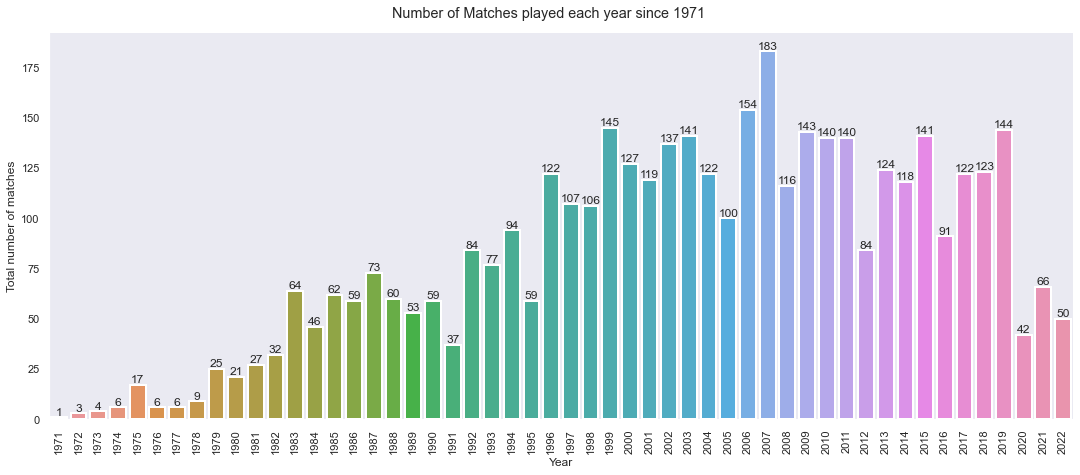

In [511]:
#count plot showing the number of matches played year year since 1971

sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.catplot(data = df, x = 'Match_Year', kind = "count", height=6, aspect=15/6, linewidth = 2)
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03)
g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

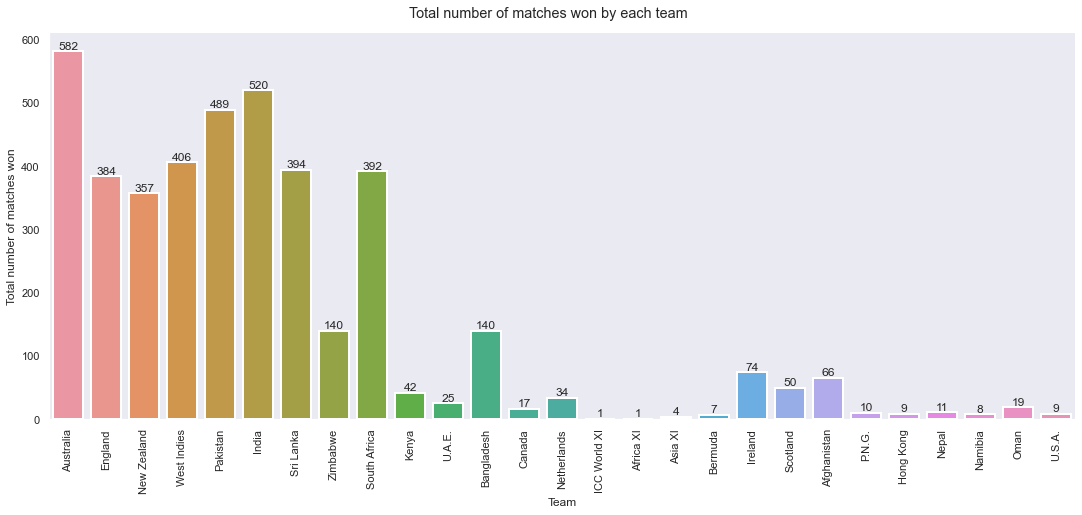

In [322]:
#count plot showing the number of matches played year year since 1971

sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.catplot(data = df, x = 'Winner', kind = "count", height=6, aspect=15/6, linewidth = 2)
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
g.fig.suptitle("Total number of matches won by each team", y = 1.03)
g.set(xlabel = "Team", ylabel = "Total number of matches won")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

In [471]:
#https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe
#Melt and cross tab is use to get the count of number of matches by each team as first_innings or second _innings and total win

df1 = df[['First_Innings_Team', 'Second_Innings_Team', 'Winner']].melt(var_name='Innings', value_name='Team')

In [472]:
df1

,Innings,Team
0,First_Innings_Team,England
1,First_Innings_Team,Australia
2,First_Innings_Team,England
3,First_Innings_Team,Australia
4,First_Innings_Team,New Zealand
...,...,...
12568,Winner,Scotland
12569,Winner,Oman
12570,Winner,Scotland
12571,Winner,Scotland


In [473]:
pd.crosstab(index=df1['Team'], columns=df1['Innings'])

Innings,First_Innings_Team,Second_Innings_Team,Winner
Team,,,
Afghanistan,67,64,66
Africa XI,1,4,1
Asia XI,4,2,4
Australia,515,402,582
Bangladesh,197,190,140
Bermuda,19,16,7
Canada,38,37,17
East Africa,1,2,0
England,348,374,384


In [469]:
df2 = df1.groupby('Team', as_index=True)['Innings'].count().reset_index().rename(columns = {'Innings':'Total_matches'})

In [470]:
df2

,Team,Total_matches
0,Afghanistan,197
1,Africa XI,6
2,Asia XI,10
3,Australia,1499
4,Bangladesh,527
5,Bermuda,42
6,Canada,92
7,East Africa,3
8,England,1106
9,Hong Kong,34


In [462]:
df2.to_frame()

,Innings
Team,
Afghanistan,131
Africa XI,5
Asia XI,6
Australia,917
Bangladesh,387
Bermuda,35
Canada,75
East Africa,3
England,722


In [378]:
df.First_Innings_Team.value_counts().to_frame().reset_index().rename(columns={'index': 'First_Innings_Team', 'First_Innings_Team': 'First_Innings_Count'})

,First_Innings_Team,First_Innings_Count
0,Australia,515
1,Pakistan,471
2,India,444
3,Sri Lanka,422
4,New Zealand,377
5,West Indies,356
6,England,348
7,South Africa,303
8,Zimbabwe,260
9,Bangladesh,197


In [379]:
df.Second_Innings_Team.value_counts().to_frame().reset_index().rename(columns={'index': 'Second_Innings_Team', 'Second_Innings_Team': 'Second_Innings_Count'})

,Second_Innings_Team,Second_Innings_Count
0,India,505
1,West Indies,441
2,Pakistan,435
3,Sri Lanka,404
4,Australia,402
5,England,374
6,New Zealand,354
7,South Africa,312
8,Zimbabwe,261
9,Bangladesh,190


In [405]:
df_first = df[['First_Innings_Team']].value_counts().reset_index(name='First_Innings_count')

In [406]:
type(df_first)
df_first.set_index('First_Innings_Team', inplace = True)
df_first

,First_Innings_count
First_Innings_Team,
Australia,515
Pakistan,471
India,444
Sri Lanka,422
New Zealand,377
West Indies,356
England,348
South Africa,303
Zimbabwe,260


In [407]:
df_second = df[['Second_Innings_Team']].value_counts().reset_index(name='Second_Innings_count')

In [409]:
type(df_second)
df_second.set_index('Second_Innings_Team', inplace = True)
df_second

,Second_Innings_count
Second_Innings_Team,
India,505
West Indies,441
Pakistan,435
Sri Lanka,404
Australia,402
England,374
New Zealand,354
South Africa,312
Zimbabwe,261


In [329]:
#count plot showing the number of matches played year year since 1971

sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.catplot(data = df, x = 'Winner', kind = "bar", height=6, aspect=15/6, linewidth = 2)
g.fig.suptitle("Total number of matches won by each team", y = 1.03)
g.set(xlabel = "Team", ylabel = "Total number of matches won")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

TypeError: Horizontal orientation requires numeric `x` variable.

In [200]:
df.groupby(['Winner', 'Match_Year'])['Winner'].count()

Winner       Match_Year
Afghanistan  2009          2
             2010          7
             2011          2
             2012          1
             2013          4
                          ..
Zimbabwe     2017          6
             2018          5
             2019          4
             2021          1
             2022          1
Name: Winner, Length: 528, dtype: int64

In [201]:
df[['Winner', 'Match_Year']].value_counts().sort_index()

Winner       Match_Year
Afghanistan  2009          2
             2010          7
             2011          2
             2012          1
             2013          4
                          ..
Zimbabwe     2017          6
             2018          5
             2019          4
             2021          1
             2022          1
Length: 528, dtype: int64

In [299]:
df_lineplot = (df.groupby(['Winner', 'Match_Year'], sort = True).size() 
   #.sort_values(ascending=False) 
   .reset_index(name='Number_of_wins')
   .drop_duplicates(subset=['Winner', 'Match_Year']))
             

In [300]:
df_lineplot.head()

,Winner,Match_Year,Number_of_wins
0,Afghanistan,2009,2
1,Afghanistan,2010,7
2,Afghanistan,2011,2
3,Afghanistan,2012,1
4,Afghanistan,2013,4


In [266]:
#df_lineplot = df_lineplot.query('Number_of_wins >= 20 or Winner isin.())
                                
#df_lineplot_final = df_lineplot.query('Number_of_wins >= 20').Winner.unique()


In [267]:
df_lineplot_final

array(['Australia', 'England', 'India', 'New Zealand', 'Pakistan',
       'South Africa', 'Sri Lanka', 'West Indies'], dtype=object)

In [304]:
df_lineplot_final['Winner'].unique()

array(['Australia', 'England', 'India', 'New Zealand', 'Pakistan',
       'South Africa', 'Sri Lanka', 'West Indies'], dtype=object)

In [301]:
df_lineplot_final = df_lineplot[(df_lineplot.Number_of_wins >= 20) | (df_lineplot.Winner.isin(df_lineplot.query('Number_of_wins >= 20').Winner.unique()))]

In [302]:
df_lineplot.value_counts()

Winner       Match_Year  Number_of_wins
Afghanistan  2009        2                 1
Pakistan     2018        8                 1
Scotland     2015        1                 1
             2014        4                 1
             2013        2                 1
                                          ..
India        1997        10                1
             1996        13                1
             1995        7                 1
             1994        16                1
Zimbabwe     2022        1                 1
Length: 528, dtype: int64

In [303]:
df_lineplot_final

,Winner,Match_Year,Number_of_wins
16,Australia,1971,1
17,Australia,1972,1
18,Australia,1974,2
19,Australia,1975,4
20,Australia,1977,1
...,...,...,...
494,West Indies,2018,8
495,West Indies,2019,10
496,West Indies,2020,3
497,West Indies,2021,4


<function matplotlib.pyplot.show(close=None, block=None)>

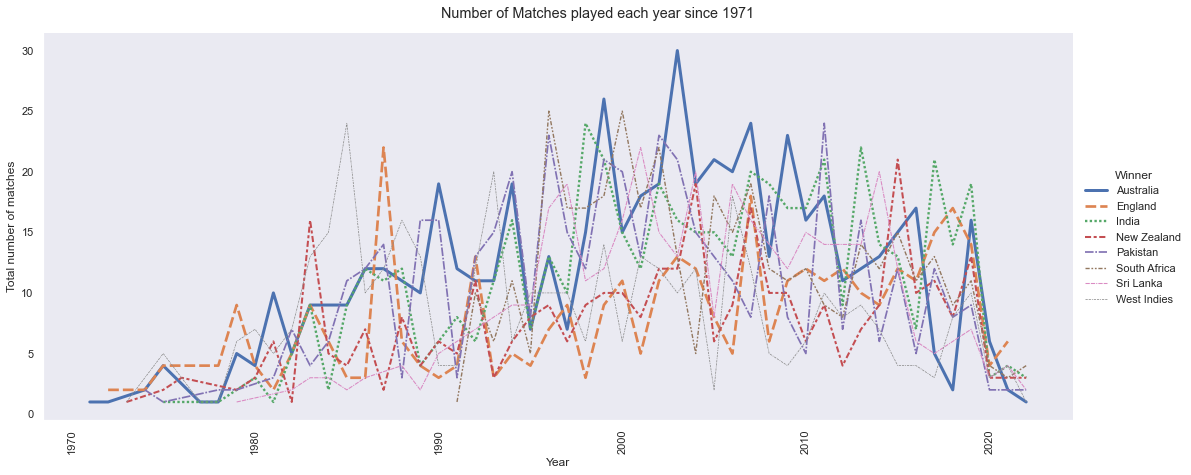

In [317]:
#Line plot showing the number of matches won by test playing nations since 1971 or team which have won 20 or more matches in a year


sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.relplot(data = df_lineplot_final, x = 'Match_Year', y = 'Number_of_wins',  kind = "line", height=6, aspect=15/6, linewidth = 2, 
                hue = 'Winner', style = 'Winner', size = 'Winner')
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03)
g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

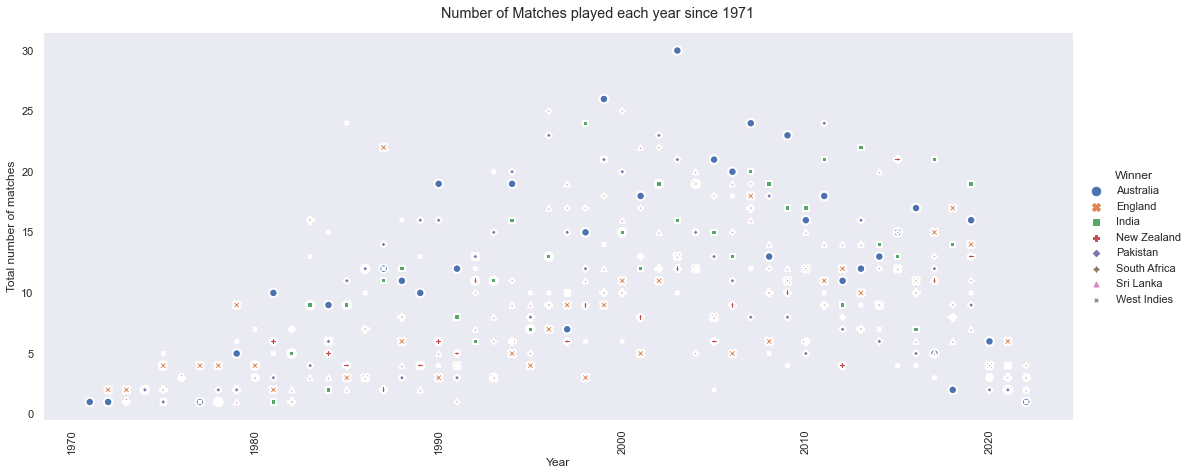

In [311]:
#Line plot showing the number of matches won by test playing nations since 1971 or team which have won 20 or more matches in a year


sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.relplot(data = df_lineplot_final, x = 'Match_Year', y = 'Number_of_wins',  kind = "scatter", height=6, aspect=15/6, linewidth = 2, 
                hue = 'Winner', style = 'Winner', size = 'Winner')
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03)
g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

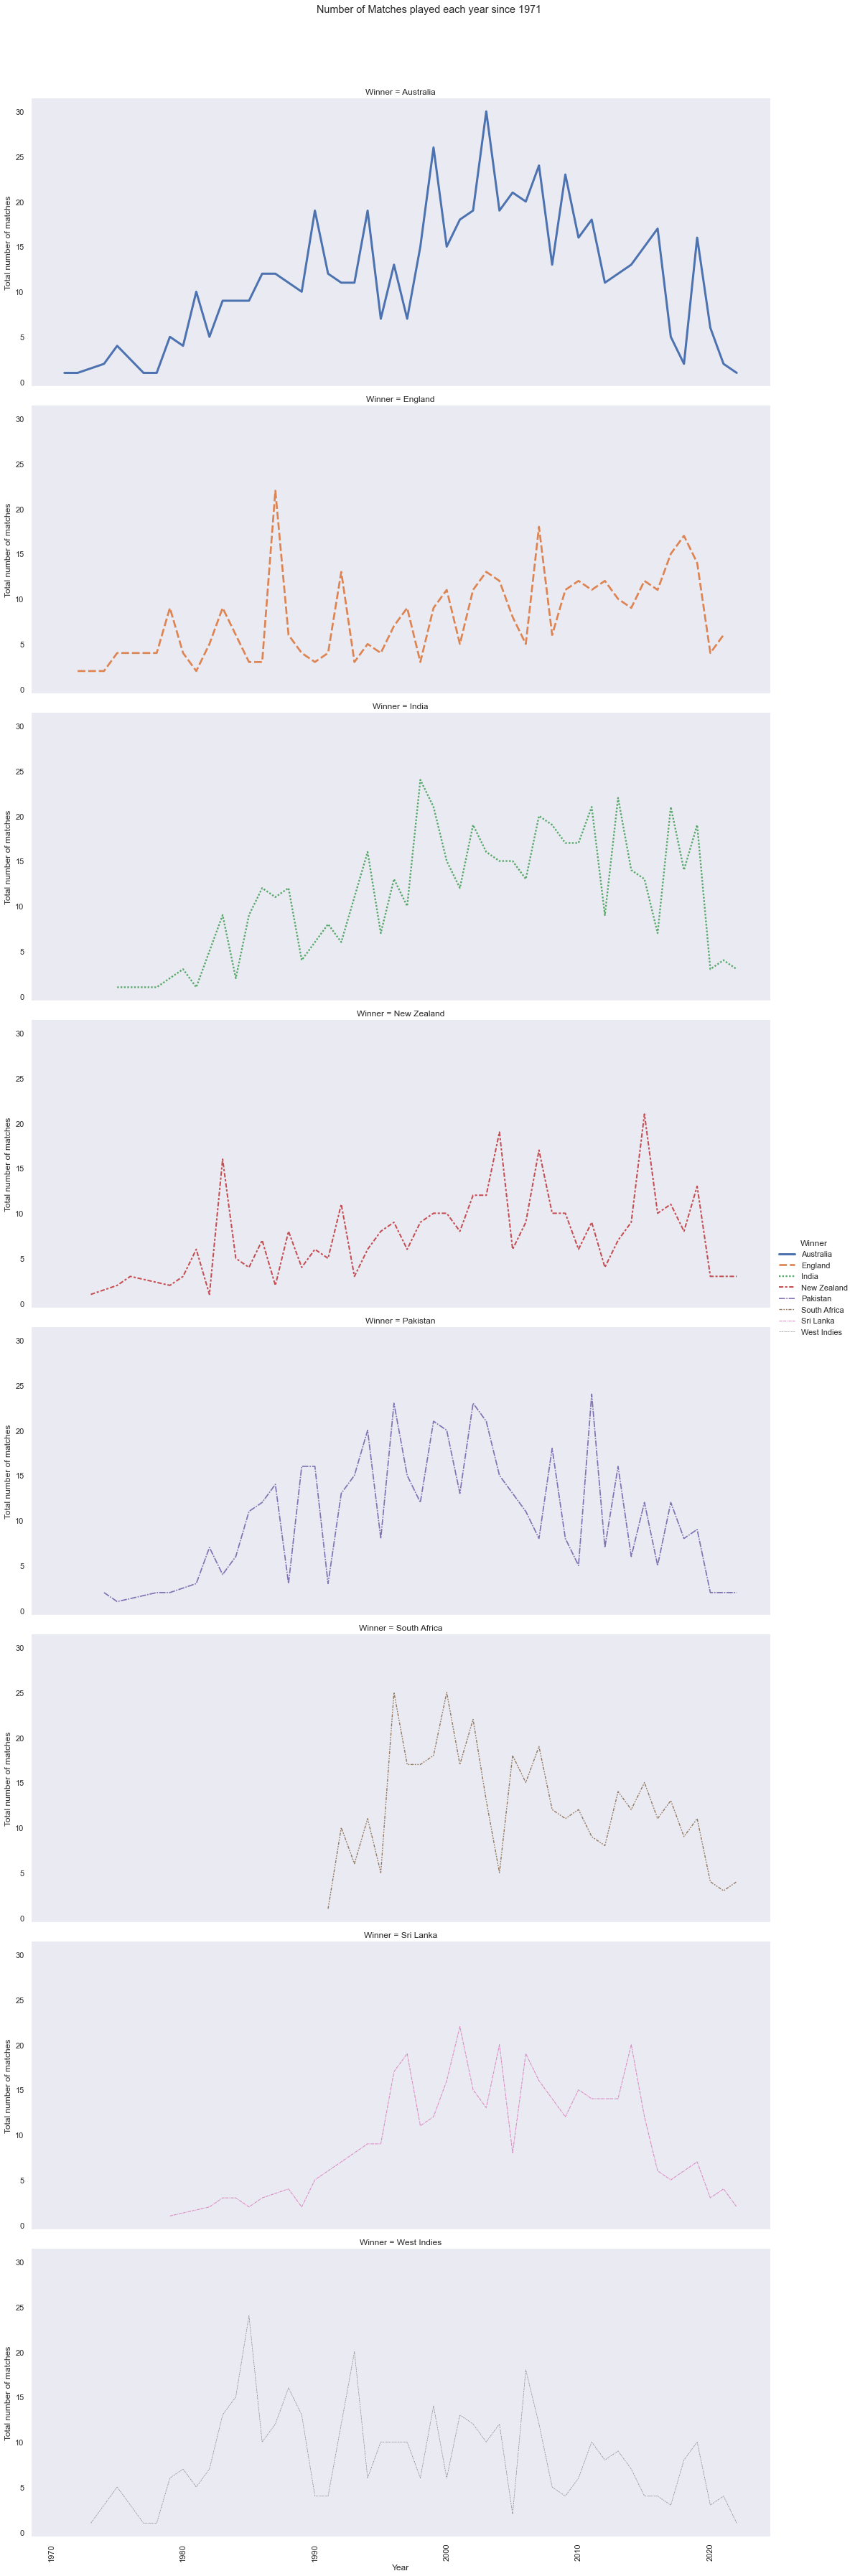

In [319]:
#Line plot showing the number of matches won by test playing nations since 1971 or team which have won 20 or more matches in a year


sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.relplot(data = df_lineplot_final, x = 'Match_Year', y = 'Number_of_wins',  kind = "line", height=6, aspect=15/6, linewidth = 2, 
                hue = 'Winner', style = 'Winner', size = 'Winner', row = 'Winner')
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03)
g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

In [311]:

url = "https://stats.espncricinfo.com/ci/engine/match/1211169.html"
html = requests.get(url).content
    #Parse the data
soup = BeautifulSoup(html, 'html.parser')
#print(soup)
rows = soup.find_all("div", {"class": "ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"})
#print(rows)
detail_score =[]
#<div class="ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-opacity-50 ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="United Arab Emirates Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313147.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/united-arab-emirates-27" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">United Arab Emirates</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5"></span><strong class="">170</strong></div></div><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="Oman Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313157.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/oman-37" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">Oman</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5">(37.3/50 ov) </span><strong class="">171/5</strong></div></div></div>
for row in rows:
    columns = row.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
    for column in columns:
        x = column.text
        print(x)
        detail_score.append(x)
    columns1 = row.find_all("div", {"class": "ds-text-compact-m ds-text-typo-title"})
    for column in columns1:
        y = column.text
        print(y)
        detail_score.append(y)
print(detail_score)

United Arab Emirates
Oman
170
(37.3/50 ov) 171/5
['United Arab Emirates', 'Oman', '170', '(37.3/50 ov) 171/5']
